# Modelo LSTM para prever dados de ações
Prof. Fernando Amaral

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt


In [35]:
df = pd.read_csv('all_stocks_5yr.csv')

In [36]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [37]:
companies = df.Name.unique()
companies

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [38]:
z = df.loc[df['Name'] == 'ZTS']
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 617781 to 619039
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 78.7+ KB


In [39]:
z.head()

,date,open,high,low,close,volume,Name
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS
617785,2013-02-14,33.39,33.45,32.77,33.27,2954324,ZTS


In [40]:
trainingd = z.iloc[:, 4:5].values

In [41]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(trainingd)

In [42]:
x_train = []
y_train = []
timestamp = 45
length = len(trainingd)
for i in range(timestamp, length):
    x_train.append(training_set_scaled[i-timestamp:i, 0])
    y_train.append(training_set_scaled[i, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [43]:
print (x_train[0])
print ('\n')
print (y_train[0])

[0.08995937 0.09402205 0.10330818 0.09963242 0.09421552 0.10795125
 0.10524279 0.08357516 0.08047978 0.08106017 0.07100019 0.07041981
 0.07583672 0.09769781 0.11994583 0.11510931 0.11394854 0.10543625
 0.11917199 0.11007932 0.11182047 0.10485587 0.10833817 0.12071967
 0.09750435 0.08589669 0.08512285 0.09885858 0.09808474 0.0913136
 0.07854517 0.07951248 0.08396208 0.09673051 0.08106017 0.08028632
 0.0798994  0.06655059 0.06887212 0.08744438 0.09750435 0.09189398
 0.09208744 0.09344167 0.07428903]


0.0930547494679822


In [44]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1214, 45, 1)

In [45]:
model = Sequential() 

model.add(LSTM(units = 120, return_sequences = True, input_shape = (x_train.shape[1], 1))) 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 120, return_sequences = False)) 
model.add(Dropout(0.2))
model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Train on 1214 samples
Epoch 1/25
1214/1214 [==============================] - 7s 5ms/sample - loss: 0.0012
Epoch 2/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 0.0010
Epoch 3/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 0.0012 4s - loss: 0. - E
Epoch 4/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 9.7650e-04
Epoch 5/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 9.9390e-04
Epoch 6/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 9.8479e-04
Epoch 7/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 0.0011
Epoch 8/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 9.8423e-04
Epoch 9/25
1214/1214 [==============================] - 9s 7ms/sample - loss: 0.0011
Epoch 10/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 0.0011
Epoch 11/25
1214/1214 [==============================] - 7s 6ms/sample - loss: 0.0011 2s - 
E

In [63]:
test_set = df.loc[df['Name'] == 'BA']
test_set = test_set.loc[:, test_set.columns=='close']

In [64]:
y_test = test_set.iloc[timestamp:,0:].values

In [65]:
closing_price = test_set.iloc[:,0:].values
closing_price_scaled = sc.transform(closing_price)

In [66]:
x_test = []
length = len(test_set)

for i in range(timestamp, length):
    x_test.append(closing_price_scaled[i-timestamp:i,0])

x_test = np.array(x_test)
x_test.shape

(1214, 45)

In [67]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(1214, 45, 1)

In [69]:
y_pred = model.predict(x_test)
predicted_price = sc.inverse_transform(y_pred)

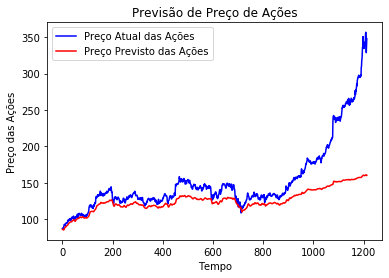

In [70]:
plt.plot(y_test, color='blue', label='Preço Atual das Ações')
plt.plot(predicted_price, color='red', label='Preço Previsto das Ações')
plt.title('Previsão de Preço de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preço das Ações')
plt.legend()
plt.show()